<a href="https://colab.research.google.com/github/CarlosARossi/dataScienceCoder/blob/main/Data_Wrangling%2BRossi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Wrangling


### Objetivos generales

1. Iniciar el proceso de limpieza y exploración de datos según el dataset elegido para el proyecto final







## 1. Análisis de Datos

### 1.1. Importación de librerias y datasets

In [32]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import learning_curve
import matplotlib.ticker as ticker
from wordcloud import WordCloud

Importo el dataset generado en el notebook [ProyectoDS_ParteII_+Rossi.ipynb](https://github.com/CarlosARossi/dataScienceCoder/blob/main/ProyectoDS_ParteII_%2BRossi.ipynb), en el cual se aplicó una exploración de datos (EDA).

In [2]:
url = 'https://raw.githubusercontent.com/CarlosARossi/dataScienceCoder/main/Datasets/Salary_Data_2022_REV15_USD_Months.csv'
salaries_gross = pd.read_csv(url)
salaries_gross

,ID,Timestamp,Age.Range,Years.of.Experience,Industry,Job.Title,Company.Name,Education,Location,Country,...,Open.To.Discuss.Salary,How.many.months.Maternity.or.Paternity.does.your.company.offer.,Gender,X,Diverse.Identity..Optional.,Description,Exchange.rate.to.USD,SalaryUSD,Salary.Period,Monthly.SalaryUSD
0,1,12/8/2021 3:05,18-21,3.0,GAMING,STREAMER,TWITCH,None,LOS ANGELES CA,US,...,No,as much as i want,Male,NaN,NaN,TWITCH,1.00000,490000.000000,Annual,40833.333333
1,2,12/9/2021 15:49,30-33,5.0,HEALTHCARE,AESTHETIC NURSE PRACTITIONER/BUSINESS OWNER,AESTHETIC CLINIC,Master's Degree,WINNIPEG,CANADA,...,Yes,NaN,Male,NaN,NaN,AESTHETIC CLINIC,1.28848,380293.058488,Annual,31691.088207
2,3,12/8/2021 2:16,18-21,1.0,ONLINE ARCADE,OWNER,RUST CLASH,High School/GED,SAN DIEGO,US,...,Yes,NaN,Male,NaN,NaN,RUST CLASH,1.00000,480000.000000,Annual,40000.000000
3,4,12/8/2021 5:15,18-21,2.0,CRYPTO,HEAD OF MARKETING,REDACTED,Some College,"TAMPA, FL",US,...,Yes,Not sure,Male,NaN,NaN,REDACTED,1.00000,480000.000000,Annual,40000.000000
4,5,12/8/2021 14:16,34-37,13.0,WINDOW COVERINGS,OWNER,CAROLINA BLIND CRAFTERS,Bachelor's Degree,"CHARLOTTE, NC",US,...,No,None,Female,NaN,NaN,CAROLINA BLIND CRAFTERS,1.00000,480000.000000,Annual,40000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31757,31758,12/17/2021 1:49,30-33,5.0,ECOMMERCE,DESIGN MANAGER,MIS,Bachelor's Degree,MUMBAI,INDIA,...,No,NaN,Male,NaN,NaN,MIS,75.87400,0.092258,Monthly,0.092258
31758,31759,12/23/2021 4:12,22-25,5.0,HOTEL/RESTAURANT,MANAGER/CHEF,CASA BAROLO,Bachelor's Degree,"CLUJ-NAPOCA, CLUJ",ROMANIA,...,Yes,24,Female,NaN,NaN,CASA BAROLO,4.39980,1.363698,Monthly,1.363698
31759,31760,12/7/2021 19:40,58+,NaN,SPORTS,ANALYST,ESPN,None,SAN JOSE,US,...,No,0,Female,NaN,They,ESPN,1.00000,1.000000,Annual,0.083333
31760,32569,1/7/2022 12:40,26-29,4.0,MATERIAL HANDLING,SOLUTIONS CONSULTANT,DEMATIC,Bachelor's Degree,"GRAND RAPIDS, MI",US,...,Yes,NaN,Male,NaN,Hispanic,DEMATIC,1.00000,110000.000000,Annual,9166.666667


### 1.2. Análisis inicial

In [3]:
salaries_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31762 entries, 0 to 31761
Data columns (total 28 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   ID                                                               31762 non-null  int64  
 1   Timestamp                                                        31762 non-null  object 
 2   Age.Range                                                        31742 non-null  object 
 3   Years.of.Experience                                              31260 non-null  float64
 4   Industry                                                         31558 non-null  object 
 5   Job.Title                                                        31758 non-null  object 
 6   Company.Name                                                     31760 non-null  object 
 7   Education                               

Del dataset elegido, procedo a quedarme solamente con las columnas que me servirán para mi análisis.

In [4]:
# Seleccionar las columnas deseadas
columns = ['Age.Range',
           'Years.of.Experience',
           'Industry',
           'Job.Title',
           'Company.Name',
           'Education',
           'Country',
           'Gender',
           'Monthly.SalaryUSD']

salaries_short = salaries_gross[columns]

salaries_short.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31762 entries, 0 to 31761
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age.Range            31742 non-null  object 
 1   Years.of.Experience  31260 non-null  float64
 2   Industry             31558 non-null  object 
 3   Job.Title            31758 non-null  object 
 4   Company.Name         31760 non-null  object 
 5   Education            31762 non-null  object 
 6   Country              31762 non-null  object 
 7   Gender               31762 non-null  object 
 8   Monthly.SalaryUSD    31762 non-null  float64
dtypes: float64(2), object(7)
memory usage: 2.2+ MB


Procedo a analizar del dataset la cantidad de instancias únicas de las caracteristicas consideradas como variables nominales:

In [5]:
# Contar la cantidad de instancias únicas de las caracteristicas considerads como variables nominales

print("Cantidad de Generos:", len(salaries_short['Gender'].unique()))
print("Cantidad de Paises:", len(salaries_short['Country'].unique()))
print("Cantidad de Rangos de edad:", len(salaries_short['Age.Range'].unique()))
print("Cantidad de Industrias:", len(salaries_short['Industry'].unique()))
print("Cantidad de Puestos de trabajo:", len(salaries_short['Job.Title'].unique()))


Cantidad de Generos: 3
Cantidad de Paises: 55
Cantidad de Rangos de edad: 12
Cantidad de Industrias: 5618
Cantidad de Puestos de trabajo: 12592


Debido a la alta cantidad de instancias únicas que tienen las variables nominales elegidas, principalmente **Industry** y **Job.Title**, puedo encontrarme con problemas de alta cardinalidad.

## 2. Data Wrangling

### 2.1. Valores Faltante

In [6]:
# Controlo cuantos NaN hay en las columnas de mi dataset
for column in columns:
    nan_count = salaries_short[column].isnull().sum()
    print(f"{column} tiene {nan_count} NaN")

Age.Range tiene 20 NaN
Years.of.Experience tiene 502 NaN
Industry tiene 204 NaN
Job.Title tiene 4 NaN
Company.Name tiene 2 NaN
Education tiene 0 NaN
Country tiene 0 NaN
Gender tiene 0 NaN
Monthly.SalaryUSD tiene 0 NaN


Se realizará la eliminación de filas que contengan valores faltantes en las columnas elegidas en el punto anterior.

Esto se realizará por las siguientes razones:
1. **Integridad de los datos:** Al eliminar las filas con valores faltantes, garantizaremos que los datos restantes sean consistentes y confiables, evitando sesgos o distorsiones en los análisis y modelos posteriores.

2. **Simplificación del análisis:** Se evitara tener que lidiar con técnicas de imputación o llenado de datos faltantes, lo que simplificará el flujo de trabajo y facilitará el análisis exploratorio y los cálculos posteriores.

3. **Enfoque en variables clave:** Al seleccionar solo las columnas clave sin valores faltantes, podremos centrarnos en las variables más importantes para el estudio, lo que te brindará una visión más precisa y significativa de los factores que influyen en el salario mensual.

In [7]:
# Seleccionar las columnas deseadas
columns_to_check = ['Age.Range',
                    'Years.of.Experience',
                    'Industry',
                    'Job.Title',
                    'Company.Name',
                    ]

salaries_without_NaN = salaries_short.dropna(subset=columns_to_check)

salaries_without_NaN.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31043 entries, 0 to 31761
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age.Range            31043 non-null  object 
 1   Years.of.Experience  31043 non-null  float64
 2   Industry             31043 non-null  object 
 3   Job.Title            31043 non-null  object 
 4   Company.Name         31043 non-null  object 
 5   Education            31043 non-null  object 
 6   Country              31043 non-null  object 
 7   Gender               31043 non-null  object 
 8   Monthly.SalaryUSD    31043 non-null  float64
dtypes: float64(2), object(7)
memory usage: 2.4+ MB


### 2.2. Reducción de Instancias



Se llevará a cabo un análisis detallado de las siguientes columnas:
1. Age.Range
2. Years.of.Experience
3. Industry
4. Job.Title
5. Education
6. Country
7. Gender

Estó se realizará para comprender mejor los datos relacionados con la demografía, la experiencia laboral, la industria, el título laboral, el nivel educativo, el país y el género de los individuos en el conjunto de datos. Esta exploración permitirá obtener información relevante para el posterior modelado y predicción del salario.

Una vez realizado el análisis, se procederá a reducir las instancias del conjunto de datos, seleccionando un subconjunto de filas basado en criterios relevantes. La reducción de instancias nos permitirá enfocarnos en las características clave y construir un modelo más preciso y eficaz para predecir el salario en función de las variables seleccionadas.

#### 2.2.1. Rango de edades [Age.Range]

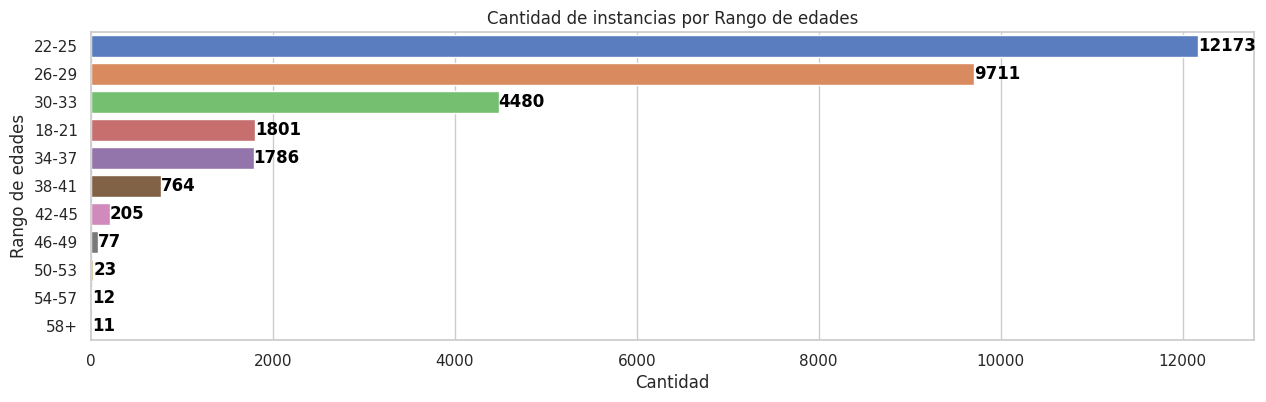

In [8]:
# Contar las instancias únicas de Age.Range
age_range_counts = salaries_without_NaN['Age.Range'].value_counts()

# Ordenar en orden descendente
age_range_counts = age_range_counts.sort_values(ascending=False)

# Establecer el estilo de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico de barras
plt.figure(figsize=(15, 4))
ax = sns.barplot(x=age_range_counts.values, y=age_range_counts.index, palette="muted")

# Agregar el número de cuentas en cada barra
for i, count in enumerate(age_range_counts):
    ax.text(count, i, str(count), ha='left', va='center', color='black', weight='bold')

# Configurar los títulos y etiquetas de los ejes
plt.xlabel('Cantidad')
plt.ylabel('Rango de edades')
plt.title('Cantidad de instancias por Rango de edades')

plt.show()

Al tener 11 variables en 'Age.Range', se podrían generar 11 nuevas columnas binarias correspondientes a cada rango de edad (One Hot Encoding), lo que permitirá utilizar estas variables en los modelos de aprendizaje sin problemas.

#### 2.2.2. Años de experiencia [Years.of.Experience]

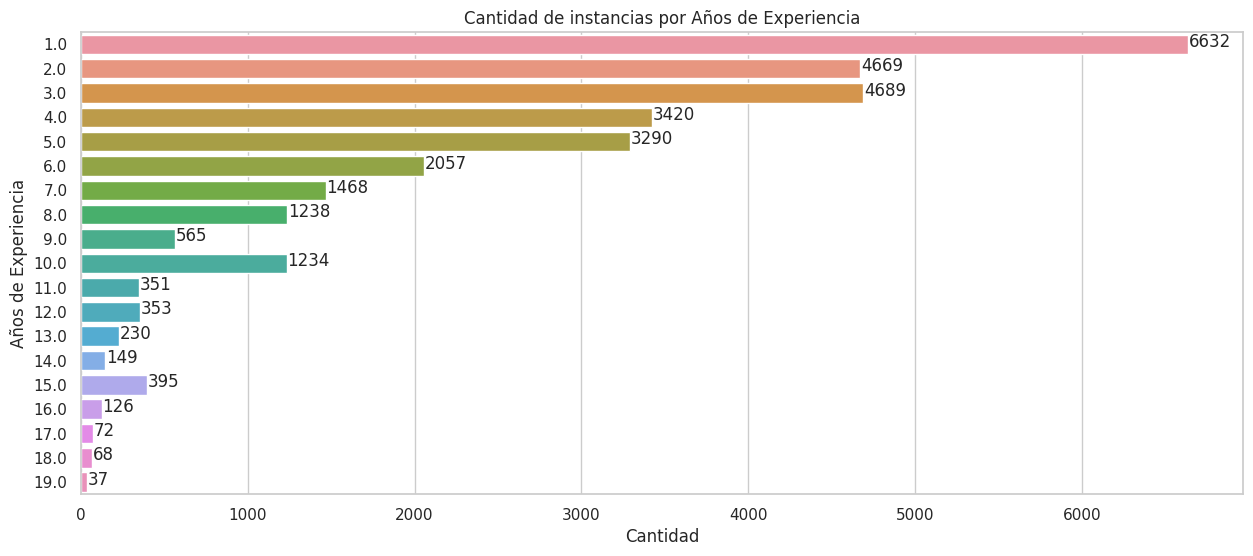

In [9]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 6))
ax = sns.countplot(y='Years.of.Experience', data=salaries_without_NaN)

# Configurar los títulos y etiquetas de los ejes
plt.xlabel('Cantidad')
plt.ylabel('Años de Experiencia')
plt.title('Cantidad de instancias por Años de Experiencia')

# Agregar el número de cuentas en cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_width():.0f}', (p.get_width()+5, p.get_y()+0.5))

plt.show()

La columna 'Years.of.Experience' es una variable ordinal, lo que implica que tiene un orden inherente y representación numérica que refleja el nivel de experiencia.

#### 2.2.3. Industrias [Industry]

Debido a la gran cantidad de instancias únicas en la columna 'Industry', se aplicará un enfoque de agrupación utilizando coincidencia de cadenas y expresiones regulares.

El objetivo es reducir la diversidad de categorías, creando grupos más amplios y generalizados.

Esto facilitará el análisis y la interpretación de los datos al identificar palabras clave y términos relacionados en las categorías existentes.

Al agrupar las industrias de manera más general, se obtendrá una mejor comprensión de los patrones y tendencias generales en los datos.

In [52]:
# Calcular la frecuencia de las categorías en Industry
industry_counts = salaries_without_NaN['Industry'].value_counts()

print("Cantidad de Industrias:", len(salaries_without_NaN['Industry'].unique()))
industry_counts

Cantidad de Industrias: 5550


TECH                              3288
HEALTHCARE                        1603
FINANCE                           1073
EDUCATION                          812
CONSULTING                         739
                                  ... 
DIGTECHAL TECH                       1
PACKAGING / MANUFACTURING            1
PAID DIGTECHAL MEDIA MARKETING       1
GLASS                                1
HOTEL/RESTAURANT                     1
Name: Industry, Length: 5550, dtype: int64

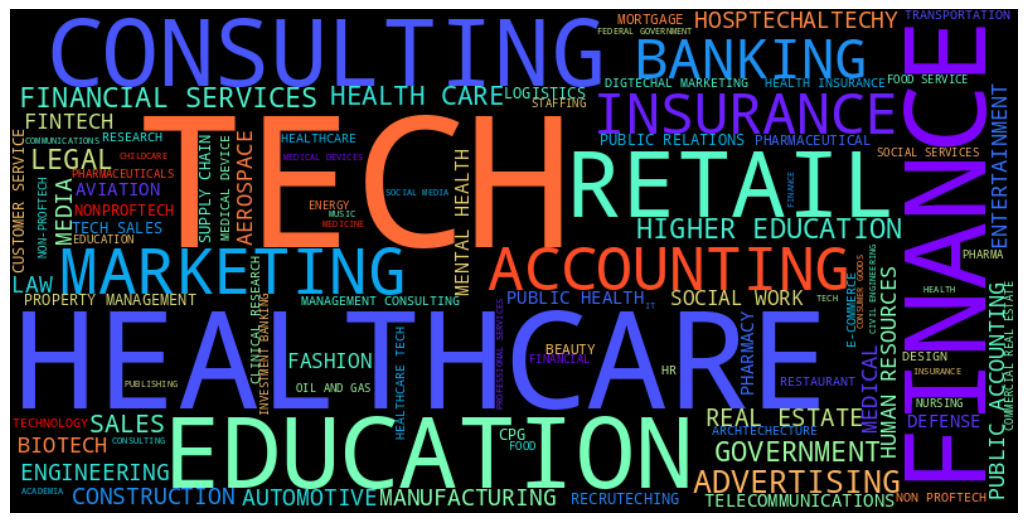

In [54]:
# Crea el objeto WordCloud con las palabras y sus respectivas frecuencias
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='rainbow',
                      contour_color='black', contour_width=1, max_words=100).generate_from_frequencies(industry_counts)

# Configura el gráfico
plt.figure(figsize=(13, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Muestra el gráfico
plt.show()

Se agruparán las industrias basándose en palabras clave obtenidas en el gráfico anterior del tipo Word Cloud. Esto mejorará la interpretación y análisis al agrupar categorías más comunes.

In [11]:
# Crear una copia del dataset anterior
salaries_re_industry = salaries_without_NaN.copy()

groupings = {
    'Technology': ['tech', 'digital', 'software', 'hardware', 'IT', 'internet', 'engineering'],
    'Healthcare': ['health', 'medical', 'pharmaceutical', 'medicine', 'physician', 'nursing', 'dentistry', 'doctor', 'pharmacy', 'nurse', 'dental', 'clinical', 'social work','pharma'],
    'Retail': ['retail', 'shopping', 'e-commerce', 'brick and mortar', 'ecommerce', 'sales','grocery'],
    'Manufacturing': ['manufacturing', 'production', 'factory', 'assembly','CPG'],
    'Finance': ['finance', 'banking', 'investments', 'accounting', 'financial', 'insurance', 'mortgage'],
    'Education & Research': ['education', 'learning', 'academia', 'teaching', 'research'],
    'Transportation': ['transportation', 'logistics', 'shipping', 'delivery','transport'],
    'Food & Beverage': ['food', 'beverage', 'restaurant', 'catering'],
    'Hospitality': ['hospitality', 'tourism', 'hotel', 'travel'],
    'Entertainment': ['entertainment', 'media', 'film', 'music', 'creative', 'content creator', 'TV'],
    'Energy': ['energy', 'utilities', 'renewable', 'power','oil','gas'],
    'Construction': ['construction', 'building', 'architecture', 'contracting'],
    'Consulting': ['consulting', 'advisory', 'strategy', 'management'],
    'Real Estate': ['real estate', 'property', 'housing', 'development'],
    'Agriculture': ['agriculture', 'farming', 'agribusiness', 'crop'],
    'Government': ['government', 'public sector', 'civil service', 'administration', 'defense'],
    'Administrative': ['administrative', 'human resources', 'social work','customer service', 'HR','human services','social services'],
    'Non-profit': ['non-profit', 'charity', 'NGO', 'volunteer'],
    'Media': ['media', 'communication', 'journalism', 'publishing', 'public relations'],
    'Automotive': ['automotive', 'vehicles', 'car', 'automobile'],
    'Aerospace': ['aerospace', 'aviation', 'aeronautics', 'space'],
    'Sports': ['sports', 'athletics', 'fitness', 'recreation','sport'],
    'Legal Services': ['legal', 'law', 'attorney', 'legal services'],
    'Marketing': ['marketing', 'advertising', 'content marketing', 'digital marketing'],
    'Fashion & Beauty': ['fashion', 'clothing', 'apparel', 'design','beauty','cosmetics'],
    'Data & AI': ['data', 'AI', 'big data', 'data science', 'analytics'],
    'Pets': ['pets', 'animals', 'pet care', 'veterinary', 'pet', 'animal', 'vet'],
    'Gaming':['gaming', 'game', 'games', 'video game', 'arcade','esport']
}



# Función para agrupar categorías basadas en patrones de coincidencia
def group_industry(category):
    for group, patterns in groupings.items():
        for pattern in patterns:
            if re.search(pattern, category, re.IGNORECASE):
                return group
    return 'Others'

# Aplicar la función de agrupación a la columna 'Industry' y crear una nueva columna 'GroupedIndustry'
salaries_re_industry['GroupedIndustry'] = salaries_re_industry['Industry'].apply(group_industry)


# Calcular la frecuencia de las categorías en GroupedIndustry
industry_counts = salaries_re_industry['GroupedIndustry'].value_counts()
with pd.option_context('display.max_rows', None):
    print(industry_counts)


print("Cantidad de Industrias Agrupadas es:", len(salaries_re_industry['GroupedIndustry'].unique()))


Technology              7519
Healthcare              4068
Finance                 4061
Others                  2695
Education & Research    1615
Retail                  1530
Marketing               1323
Consulting              1255
Entertainment            815
Government               729
Legal Services           575
Manufacturing            498
Administrative           497
Fashion & Beauty         494
Media                    431
Real Estate              413
Food & Beverage          405
Automotive               399
Construction             340
Data & AI                295
Aerospace                290
Transportation           265
Energy                   241
Sports                    84
Hospitality               74
Gaming                    51
Agriculture               48
Pets                      33
Name: GroupedIndustry, dtype: int64
Cantidad de Industrias Agrupadas es: 28


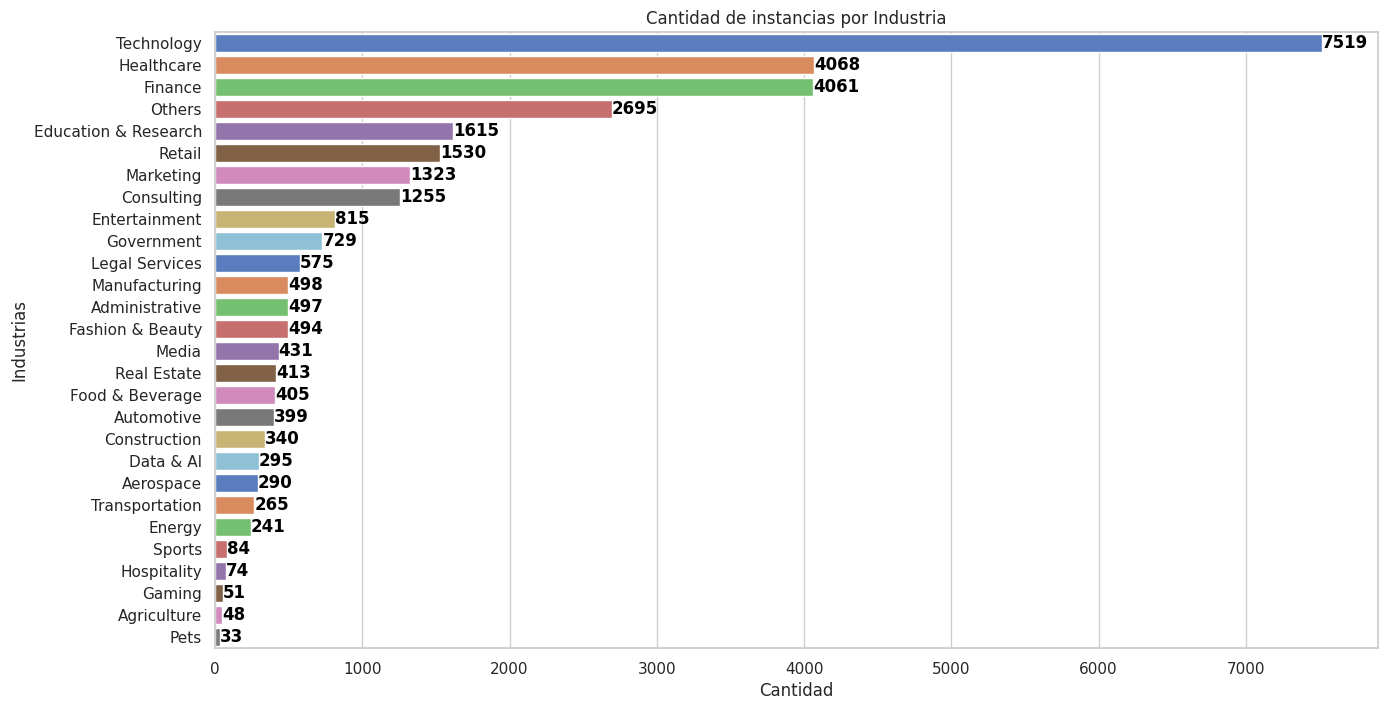

In [12]:
# Contar las instancias únicas de Industry
industry_counts = salaries_re_industry['GroupedIndustry'].value_counts()

# Ordenar en orden descendente
industry_counts = industry_counts.sort_values(ascending=False)

# Establecer el estilo de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico de barras
plt.figure(figsize=(15, 8))
ax = sns.barplot(x=industry_counts.values, y=industry_counts.index, palette="muted")

# Agregar el número de cuentas en cada barra
for i, count in enumerate(industry_counts):
    ax.text(count, i, str(count), ha='left', va='center', color='black', weight='bold')

# Configurar los títulos y etiquetas de los ejes
plt.xlabel('Cantidad')
plt.ylabel('Industrias')
plt.title('Cantidad de instancias por Industria')

plt.show()

In [13]:
salaries_re_industry.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31043 entries, 0 to 31761
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age.Range            31043 non-null  object 
 1   Years.of.Experience  31043 non-null  float64
 2   Industry             31043 non-null  object 
 3   Job.Title            31043 non-null  object 
 4   Company.Name         31043 non-null  object 
 5   Education            31043 non-null  object 
 6   Country              31043 non-null  object 
 7   Gender               31043 non-null  object 
 8   Monthly.SalaryUSD    31043 non-null  float64
 9   GroupedIndustry      31043 non-null  object 
dtypes: float64(2), object(8)
memory usage: 2.6+ MB


#### 2.2.4. Puestos de Trabajo [Job.Title]

Se utilizará el mismo enfoque de agrupación por coincidencia de cadenas y expresiones regulares en la columna 'Job.Title'.

Esto permitirá simplificar la gran cantidad de títulos de trabajo únicos y obtener categorías más generales. Al agrupar los títulos de trabajo de esta manera, se facilitará el análisis y la interpretación de los datos, así como la identificación de patrones y tendencias.

Además, este enfoque simplificado será útil para modelar y predecir salarios basados en los títulos de trabajo.

In [34]:
# Calcular la frecuencia de las categorías en Job.Title
job_title_counts = salaries_re_industry['Job.Title'].value_counts()

print("Cantidad de Puestos de trabajo:", len(salaries_re_industry['Job.Title'].unique()))

job_title_counts

Cantidad de Puestos de trabajo: 12340


SOFTWARE ENGINEER                  446
ANALYST                            419
PROJECT MANAGER                    372
ASSOCIATE                          303
ACCOUNT MANAGER                    283
                                  ... 
DIGITAL TECH LEADERSHIP PROGRAM      1
AUDIT & ASSURANCE STAFF              1
ASSISTANT PROJECT ENGINEER           1
APPLICATION EXPERT                   1
MANAGER/CHEF                         1
Name: Job.Title, Length: 12340, dtype: int64

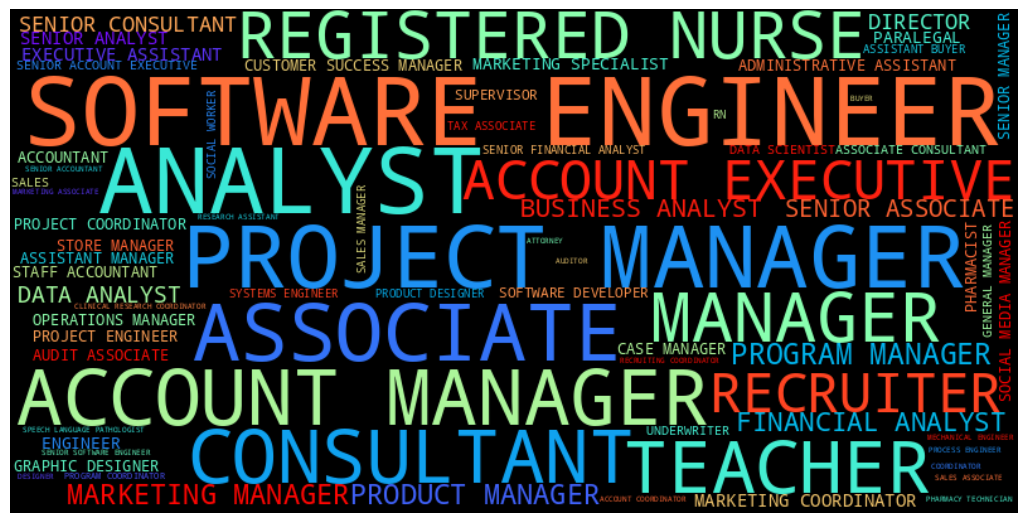

In [50]:
# Crea el objeto WordCloud con las palabras y sus respectivas frecuencias
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='rainbow',
                      contour_color='black', contour_width=1, max_words=75).generate_from_frequencies(job_title_counts)

# Configura el gráfico
plt.figure(figsize=(13, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Muestra el gráfico
plt.show()

Se agruparán los títulos de trabajo basándose en palabras clave obtenidas en el gráfico anterior del tipo Word Cloud y estableciendo un umbral de frecuencia mínima de 50 repeticiones. Esto mejorarà la interpretación y análisis al priorizar categorías más comunes.

In [15]:
# Crear una copia del dataset anterior
salaries_re_jobTitle = salaries_re_industry.copy()

keyword_patterns = {
    'Project/Program Manager': ['project manager', 'project management','project coordinator','Program Manager','PROGRAM COORDINATOR','PROJECT ADMINISTRATOR'],
    'Product Owner/Manager': ['product owner','product manager'],
    'Data Analyst': ['data analyst', 'data analysis'],
    'Data Scientist': ['data scientist','DATA ENGINEER'],
    'Data Engineer': ['DATA ENGINEER'],
    'Financial Analyst': ['financial analyst'],
    'Business Analyst': ['business analyst'],
    'Nurse': ['nurse', 'nursing','cna', 'rn'],
    'Developer': ['developer'],
    'Software Engineer': ['software engineer'],
    'Designer / UX': ['designer','UX'],
    'Teacher': ['teacher'],
    'Social Media Manager': ['Social Media Manager','Social Media'],
    'Consultant': ['consultant'],
    'Account Executive/Manager': ['account executive','account manager','ACCOUNT COORDINATOR'],
    'Director': ['director'],
    'Associate': ['associate'],
    'Assistant': ['assistant'],
    'Store Manager': ['store manager'],
    'Marketing Manager/Coordinator': ['marketing manager','marketing coordinator', 'MARKETING'],
    'Human Resourse / Recruiter': ['HR', 'human resourse','human resourser','recruiter','RECRUITING'],
    'Pharmaceutical': ['PHARMACEUTICAL','PHARMACIST','PHARMACY'],
    'Auditor': ['auditor'],
    'Testing & Quality Assurance': ['QA','test','testing','QUALITY ASSURANCE'],
    'Banker': ['BANKER'],
    'Dentist': ['dental', 'dentist','ORTHODONTIST'],
    'Underwriter': ['UNDERWRITER'],
    'Lawyer': ['law','PARALEGAL','ATTORNEY'],
    'Sales Manager': ['sales manager','sales'],
    'Operations Manager': ['operations manager'],
    'Buyer': ['buyer'],
    'Marketing Specialist': ['MARKETING SPECIALIST'],
    'Accountant': ['ACCOUNTANT'],
    'Therapist': ['THERAPIST'],
    'Researcher': ['researcher','research'],
    'V Level': ['VP', 'VICE PRESIDENT','AVP'],
    'C Level': ['CEO', 'OWNER'],
    'Social Worker': ['SOCIAL WORKER'],
    'Coordinator': ['COORDINATOR'],
    'Supervisor': ['Supervisor'],
    'Engineer': ['engineer'],
    'Specialist': ['SPECIALIST'],
    'Others Analyst': ['Analyst'],
    'Others Managers': ['Manager'],
}


# Función para realizar la agrupación por expresiones regulares y GroupedIndustry
def group_job_title(title, industry):
    if title in keyword_patterns:
        return title  # Si el Job.Title se encuentra en el diccionario, se mantiene el valor original
    else:
        for pattern_title, patterns in keyword_patterns.items():
            for pattern in patterns:
                if re.search(pattern, title, re.IGNORECASE):
                    return pattern_title
    return 'Others'  # Si no coincide con ninguna palabra clave, se mantiene el valor original

# Aplicar la agrupación por expresiones regulares y GroupedIndustry y crear una nueva columna 'GroupedJobTitle'
salaries_re_jobTitle['GroupedJobTitle'] = salaries_re_jobTitle.apply(lambda row: group_job_title(row['Job.Title'], row['GroupedIndustry']), axis=1)


# Calcular la frecuencia de las categorías en GroupedJobTitle
job_title_counts = salaries_re_jobTitle['GroupedJobTitle'].value_counts()
job_title_counts_filtered = job_title_counts[job_title_counts > 0]

with pd.option_context('display.max_rows', None):
    print(job_title_counts_filtered)


print("Cantidad de Puestos de Trabajo Agrupados es:", len(salaries_re_jobTitle['GroupedJobTitle'].unique()))


Others                           6512
Others Managers                  2344
Associate                        1999
Others Analyst                   1902
Assistant                        1400
Engineer                         1333
Consultant                       1141
Specialist                       1140
Project/Program Manager          1125
Nurse                            1108
Marketing Manager/Coordinator    1072
Director                          942
Account Executive/Manager         858
Coordinator                       710
Human Resourse / Recruiter        680
Designer / UX                     675
Sales Manager                     661
Software Engineer                 646
Teacher                           598
Product Owner/Manager             332
Accountant                        320
Supervisor                        303
Researcher                        294
Financial Analyst                 278
Business Analyst                  241
Pharmaceutical                    226
Social Media

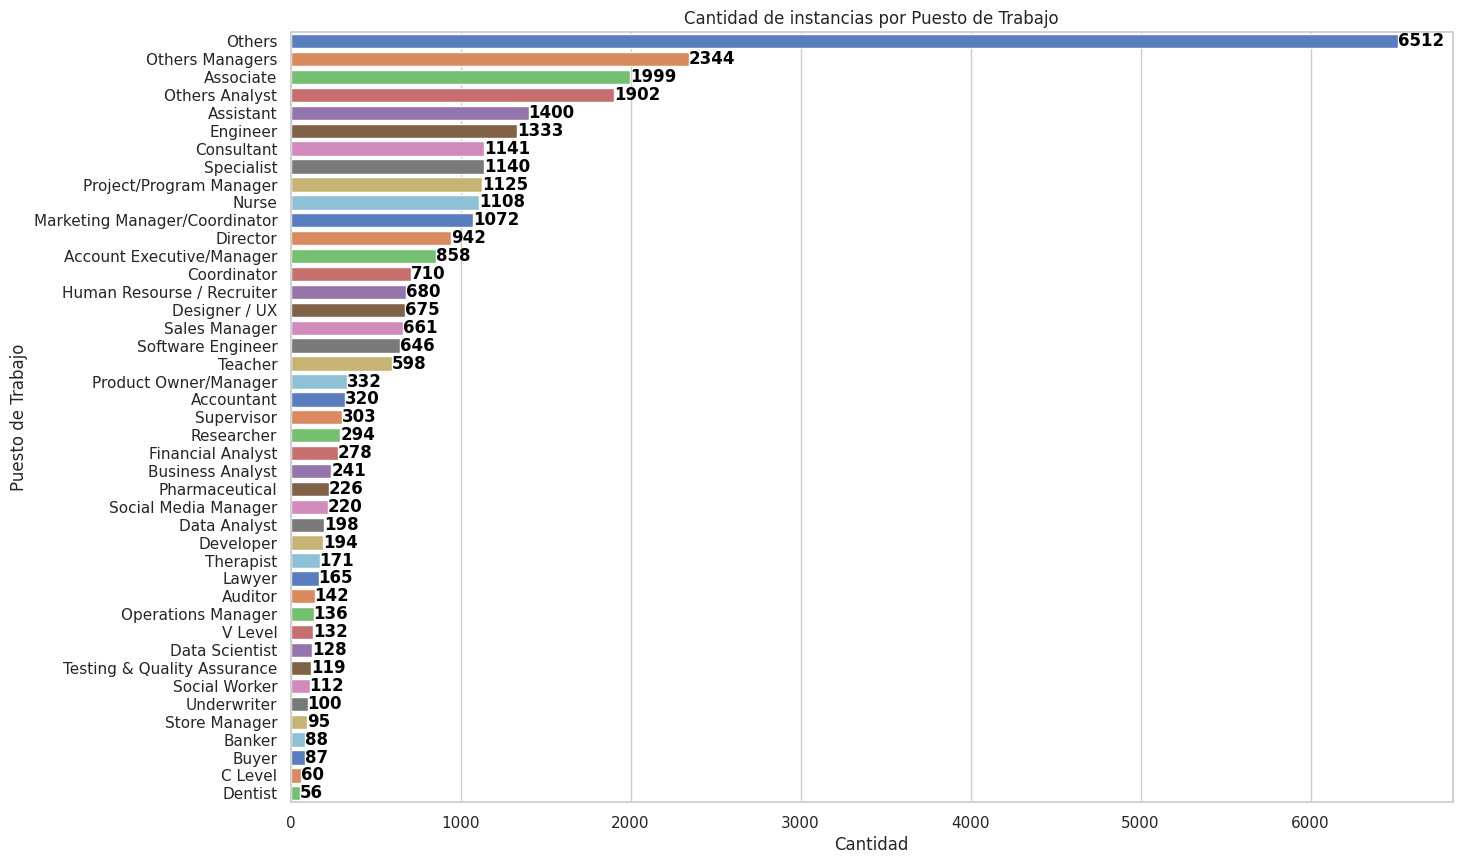

In [16]:
# Ordenar en orden descendente
job_title_counts = job_title_counts.sort_values(ascending=False)

# Establecer el estilo de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico de barras
plt.figure(figsize=(15, 10))
ax = sns.barplot(x=job_title_counts.values, y=job_title_counts.index, palette="muted")

# Agregar el número de cuentas en cada barra
for i, count in enumerate(job_title_counts):
    ax.text(count, i, str(count), ha='left', va='center', color='black', weight='bold')

# Configurar los títulos y etiquetas de los ejes
plt.xlabel('Cantidad')
plt.ylabel('Puesto de Trabajo')
plt.title('Cantidad de instancias por Puesto de Trabajo')

plt.show()

#### 2.2.5. País [Country]

In [17]:
# Crear una copia del dataset anterior
salaries_country = salaries_re_jobTitle.copy()

In [18]:
# Calcular la frecuencia de las categorías en Country
country_counts = salaries_country['Country'].value_counts()

In [19]:
# Calcular el porcentaje acumulado
country_cumsum = country_counts.cumsum() / country_counts.sum()

In [20]:
# Calcular el umbral para agrupar las categorías menos frecuentes
threshold = country_cumsum[country_cumsum > 0.995].index[0]

# Agrupar las categorías menos frecuentes en 'others'
salaries_country.loc[salaries_country['Country'].isin(country_counts[country_counts < country_counts[threshold]].index), 'Country'] = 'OTHERS'

# Verificar los resultados
print("Cantidad de Países:", len(salaries_country['Country'].unique()))

Cantidad de Países: 8


In [21]:
# Reemplaza "US" por "United States" en la columna "Country"
salaries_country['Country'] = salaries_country['Country'].replace('US', 'UNITED STATES')
salaries_country['Country'] = salaries_country['Country'].replace('UK', 'UNITED KINGDOM')

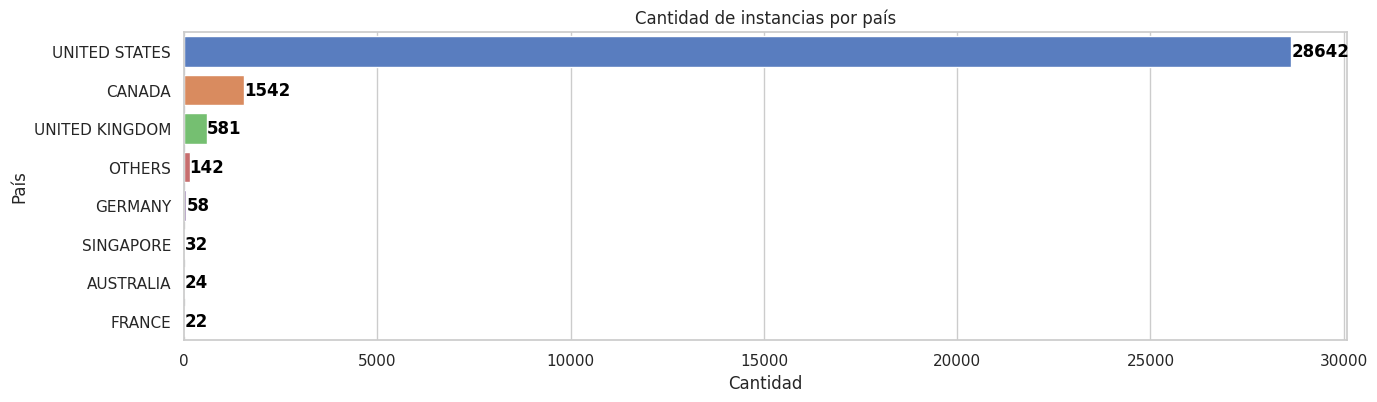

In [22]:
# Contar las instancias únicas de Country
country_counts = salaries_country['Country'].value_counts()

# Ordenar en orden descendente
country_counts = country_counts.sort_values(ascending=False)

# Establecer el estilo de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico de barras
plt.figure(figsize=(15, 4))
ax = sns.barplot(x=country_counts.values, y=country_counts.index, palette="muted")

# Agregar el número de cuentas en cada barra
for i, count in enumerate(country_counts):
    ax.text(count, i, str(count), ha='left', va='center', color='black', weight='bold')

# Configurar los títulos y etiquetas de los ejes
plt.xlabel('Cantidad')
plt.ylabel('País')
plt.title('Cantidad de instancias por país')

plt.show()

#### 2.2.6. Empresa [Company.Name]

In [23]:
# Crear una copia del dataset anterior
salaries_company = salaries_country.copy()

In [24]:
# Genero agrupaciones o cambios de nombre para facilitar el manejo posterior de la API
groupings = {
    'META HEADQUARTERS': ['META'],
    'GOOGLEPLEX': ['GOOGLE'],
    'SALESFORCE TOWER': ['SALESFORCE'],
    'ERNST & YOUNG': ['Ernst & Young','EY'],
    "L'OREAL": ['LOREAL','LÂ€™OREAL',"L'OREAL",'LÂ€™ORÃ©AL'],
    "MCDONALD'S": ['MCDONALDS','MCDONALDÂ€™S'],
    'W/O COMPANY': ['ANONYMOUS','SELF-EMPLOYED','PRIVATE PRACTICE','START UP','.','SMALL BUSINESS','TECH COMPANY','LAW FIRM','CONFIDENTIAL',
                    'NONPROFIT','STARTUP','PUBLIC SCHOOL','HOSPITAL','PRIVATE','BANK','X','SCHOOL','REDACTED','UNIVERSITY','GOVERNMENT','AGENCY'] #Agrupo en W/O COMPANY los Company.Name que no representen a una empresa y que tengan mas de 20 repeticiones
}

# Función para agrupar categorías basadas en patrones de coincidencia
def group_company(company_name):
    for group, company_names in groupings.items():
      if company_name in company_names:
          return group
    return company_name

# Aplicar la función de agrupación a la columna 'Company.Name' y crear una nueva columna 'GroupedCompany'
salaries_company['GroupedCompany'] = salaries_company['Company.Name'].apply(group_company)


# Calcular la frecuencia de las categorías en GroupedCompany
company_counts = salaries_company['GroupedCompany'].value_counts()

# Reemplazar empresas con menos de 20 repeticiones por "OTHER"
salaries_company.loc[~salaries_company['GroupedCompany'].isin(company_counts[company_counts >= 20].index), 'GroupedCompany'] = 'OTHER'

# Calcular la frecuencia de las categorías nuevamente después del reemplazo
# company_counts_filtered = salaries_company['GroupedCompany'].value_counts()

# with pd.option_context('display.max_rows', None):
#     print(company_counts_filtered)


print("Cantidad de Empresas Agrupadas es:", len(salaries_company['GroupedCompany'].unique()))

Cantidad de Empresas Agrupadas es: 118


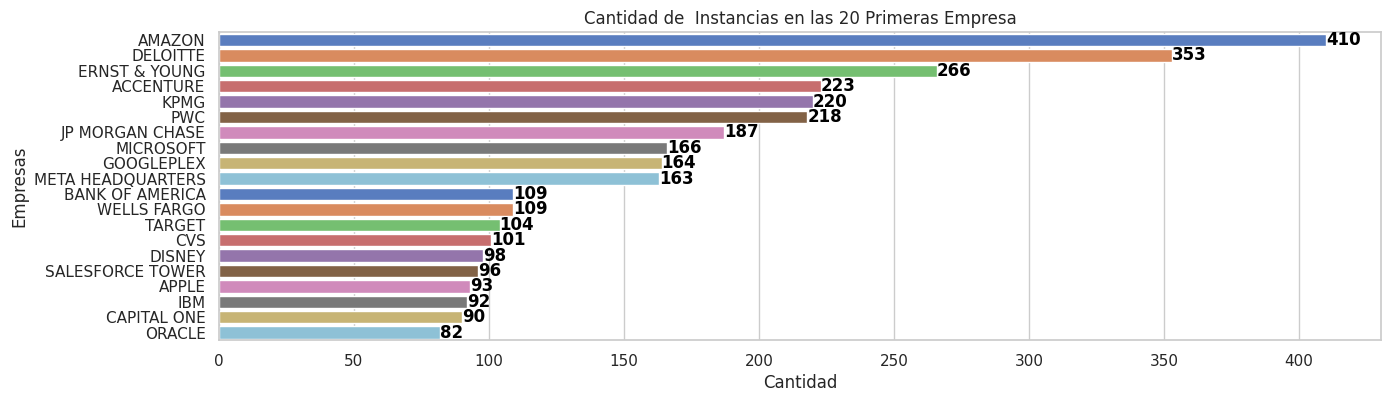

In [25]:
# Filtrar los datos 'W/O COMPANY' y 'OTHERS' de company_counts
filtered_counts = company_counts.drop(['W/O COMPANY', 'OTHERS'], errors='ignore')

# Obtener los primeros 20 valores
top_20_counts = filtered_counts.nlargest(20)

# Establecer el estilo de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico de barras
plt.figure(figsize=(15, 4))
ax = sns.barplot(x=top_20_counts.values, y=top_20_counts.index, palette="muted")

# Agregar el número de cuentas en cada barra
for i, count in enumerate(top_20_counts):
    ax.text(count, i, str(count), ha='left', va='center', color='black', weight='bold')

# Configurar los títulos y etiquetas de los ejes
plt.xlabel('Cantidad')
plt.ylabel('Empresas')
plt.title('Cantidad de  Instancias en las 20 Primeras Empresa')

plt.show()

#### 2.2.7. Conclusión

In [26]:
# Crear una copia del dataset anterior
salaries_reduced = salaries_company.copy()

In [27]:
# Contar la cantidad de instancias únicas de las caracteristicas considerads como variables nominales

print("Cantidad de Rango de Edades Antes:", len(salaries_gross['Age.Range'].unique()))
print("Cantidad de Rango de Edades Ahora:", len(salaries_reduced['Age.Range'].unique()))
print("----------------------------------------")
print("Cantidad de Años de Experiencia Antes:", len(salaries_gross['Years.of.Experience'].unique()))
print("Cantidad de Años de Experiencia Ahora:", len(salaries_reduced['Years.of.Experience'].unique()))
print("----------------------------------------")
print("Cantidad de Industrias Antes:", len(salaries_gross['Industry'].unique()))
print("Cantidad de Industrias Ahora:", len(salaries_reduced['GroupedIndustry'].unique()))
print("----------------------------------------")
print("Cantidad de Puestos de trabajo Antes:", len(salaries_gross['Job.Title'].unique()))
print("Cantidad de Puestos de trabajo Ahora:", len(salaries_reduced['GroupedJobTitle'].unique()))
print("----------------------------------------")
print("Cantidad de Empresas Antes:", len(salaries_gross['Company.Name'].unique()))
print("Cantidad de Empresas Ahora:", len(salaries_reduced['GroupedCompany'].unique()))
print("----------------------------------------")
print("Cantidad de Paises Antes:", len(salaries_gross['Country'].unique()))
print("Cantidad de Paises Ahora:", len(salaries_reduced['Country'].unique()))
print("----------------------------------------")
print("Cantidad de Generos Antes:", len(salaries_gross['Gender'].unique()))
print("Cantidad de Generos Ahora:", len(salaries_reduced['Gender'].unique()))

Cantidad de Rango de Edades Antes: 12
Cantidad de Rango de Edades Ahora: 11
----------------------------------------
Cantidad de Años de Experiencia Antes: 20
Cantidad de Años de Experiencia Ahora: 19
----------------------------------------
Cantidad de Industrias Antes: 5618
Cantidad de Industrias Ahora: 28
----------------------------------------
Cantidad de Puestos de trabajo Antes: 12592
Cantidad de Puestos de trabajo Ahora: 43
----------------------------------------
Cantidad de Empresas Antes: 14718
Cantidad de Empresas Ahora: 118
----------------------------------------
Cantidad de Paises Antes: 55
Cantidad de Paises Ahora: 8
----------------------------------------
Cantidad de Generos Antes: 3
Cantidad de Generos Ahora: 3


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Ruta completa del archivo CSV en tu Google Drive
csv_file_path = '/content/drive/MyDrive/salaries_data_wrangling.csv'

# Exportar el DataFrame a un archivo CSV
salaries_reduced.to_csv(csv_file_path, index=False)

### 2.3. Feature Engineering


#### 2.3.1. One-Hot Encoding

Se aplicará One-Hot Encoding a las siguientes características:

* Country
* Age.Range
* Industry
* Job.Title
* Gender

Las cuales fueron elegidas debido a su naturaleza nominal y la cantidad moderada de instancias únicas en cada una de ellas. Esta técnica convierte las variables categóricas en columnas separadas con valores binarios.

In [29]:
nominal_variables = ['Country', 'Age.Range', 'GroupedIndustry', 'GroupedJobTitle', 'Gender']

# Aplicar One-Hot Encoding
salaries_one_hot = pd.get_dummies(salaries_reduced, columns=nominal_variables)

# Verificar los resultados
salaries_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31043 entries, 0 to 31761
Data columns (total 100 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Years.of.Experience                            31043 non-null  float64
 1   Industry                                       31043 non-null  object 
 2   Job.Title                                      31043 non-null  object 
 3   Company.Name                                   31043 non-null  object 
 4   Education                                      31043 non-null  object 
 5   Monthly.SalaryUSD                              31043 non-null  float64
 6   GroupedCompany                                 31043 non-null  object 
 7   Country_AUSTRALIA                              31043 non-null  uint8  
 8   Country_CANADA                                 31043 non-null  uint8  
 9   Country_FRANCE                                 31

#### 2.3.2. Ordinal Encoding

Se aplicará Ordinal Encoding a la siguiente caracteristica:

* Education  

Se eligió este método porque la variable Education tiene un orden implícito, como por ejemplo "High School" < "Bachelor's Degree" < "Master's Degree", y el Ordinal Encoding captura esta jerarquía de manera adecuada.

In [30]:
# Analiso cuales son las instancias unicas dentro de Education
salaries_one_hot['Education'].unique()

array(['None', "Master's Degree", 'High School/GED', 'Some College',
       "Bachelor's Degree", 'Doctorate Degree', 'Trade/Vocational',
       "Associate's Degree"], dtype=object)

In [31]:
from sklearn.preprocessing import OrdinalEncoder

# Crear una copia del dataset anterior
salaries_encoded = salaries_one_hot.copy()

# Definir el orden de los tipos de estudios
education_order = ['None', 'High School/GED', 'Trade/Vocational', 'Some College', "Associate's Degree", "Bachelor's Degree", "Master's Degree", 'Doctorate Degree']

# Crear el objeto OrdinalEncoder con el orden específico
ordinal_encoder = OrdinalEncoder(categories=[education_order])

# Aplicar el encoding ordinal a la columna 'Education'
salaries_encoded['Education'] = ordinal_encoder.fit_transform(salaries_encoded[['Education']])

# Verificar los resultados
salaries_encoded

,Years.of.Experience,Industry,Job.Title,Company.Name,Education,Monthly.SalaryUSD,GroupedCompany,Country_AUSTRALIA,Country_CANADA,Country_FRANCE,...,GroupedJobTitle_Store Manager,GroupedJobTitle_Supervisor,GroupedJobTitle_Teacher,GroupedJobTitle_Testing & Quality Assurance,GroupedJobTitle_Therapist,GroupedJobTitle_Underwriter,GroupedJobTitle_V Level,Gender_Female,Gender_LGBTQ+,Gender_Male
0,3.0,GAMING,STREAMER,TWITCH,0.0,40833.333333,OTHER,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,5.0,HEALTHCARE,AESTHETIC NURSE PRACTITIONER/BUSINESS OWNER,AESTHETIC CLINIC,6.0,31691.088207,OTHER,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,1.0,ONLINE ARCADE,OWNER,RUST CLASH,1.0,40000.000000,OTHER,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2.0,CRYPTO,HEAD OF MARKETING,REDACTED,3.0,40000.000000,W/O COMPANY,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,13.0,WINDOW COVERINGS,OWNER,CAROLINA BLIND CRAFTERS,5.0,40000.000000,OTHER,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31756,5.0,EDUCATION,PARAEDUCATOR,ELEMENTARY SCHOOL,4.0,0.750000,OTHER,0,0,0,...,0,0,0,0,0,0,0,1,0,0
31757,5.0,ECOMMERCE,DESIGN MANAGER,MIS,5.0,0.092258,OTHER,0,0,0,...,0,0,0,0,0,0,0,0,0,1
31758,5.0,HOTEL/RESTAURANT,MANAGER/CHEF,CASA BAROLO,5.0,1.363698,OTHER,0,0,0,...,0,0,0,0,0,0,0,1,0,0
31760,4.0,MATERIAL HANDLING,SOLUTIONS CONSULTANT,DEMATIC,5.0,9166.666667,OTHER,0,0,0,...,0,0,0,0,0,0,0,0,0,1
